<a href="https://colab.research.google.com/github/RebeccaLee/Stock-Market-Data-Analysis/blob/main/Stock_Data_Programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualization


In this individual assignment, we will focus on data visualization of stock prices. We will use the same dataset as in the prior homework assignment. Keep in mind, this assignment is just meant to practice your visualization skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is challenging and you have to look things up on your own to try to solve the tasks issued. **
____
We'll focus on tech stocks and see how they progressed throughout the year of 2023. You may look at other sectors as well in the end of this notebook, such as airline companies and retail industry.

To submit the assignment you can download the completed assignment in the **.ipynb** format **as well as** the **.pdf** from the notebook (go to File->Download as) and upload the same on Canvas. If someone is not able to upload the file in .ipynb format or .pdf, please upload the .html version.

# Part 1


## Get the Data

In this section we will learn how to use pandas to directly read data from Yahoo! Finance's API.

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install yfinance for this to work!](https://github.com/ranaroussi/yfinance) Use this link for install guidance (**pip install yfinance**).*

### The Imports

You need to install pandas yfinance first. You may comment out the first line in the following cell to install the module or use the command line and run the following command:

python3 -m pip install yfinance

The -m tells it to install the module.



In [ ]:
#!pip install yfinance
import yfinance as yf

In [ ]:
import pandas as pd
import numpy as np
pd.core.common.is_list_like = pd.api.types.is_list_like

import datetime
%matplotlib inline

In [ ]:
start = datetime.datetime(2023, 1, 1)

end = datetime.datetime(2023, 12, 31)

In [ ]:
# Amazon
Amazon = yf.download("AMZN", start, end)

# Meta
Meta = yf.download("META", start, end)

# Alphabet
Alphabet = yf.download("GOOG", start, end)

# Microsoft
Microsoft = yf.download("MSFT", start, end)

# Apple
Apple = yf.download("AAPL", start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
Amazon.reset_index(inplace=True)
Meta.reset_index(inplace=True)
Alphabet.reset_index(inplace=True)
Microsoft.reset_index(inplace=True)
Apple.reset_index(inplace=True)

##### Add a Column_Company Name (this is filled out for you)

In [ ]:
Amazon["Company"]='Amazon'
Meta["Company"]='Meta'
Microsoft["Company"]='Microsoft'
Apple["Company"]='Apple'
Alphabet["Company"]='Alphabet'

#### Alternatively

You may download the datasets from Canvas and then import them in this notebook.

In [ ]:
Amazon = pd.read_csv("Amazon.csv")

Meta = pd.read_csv("Meta.csv")

Microsoft = pd.read_csv("Microsoft.csv")

Apple = pd.read_csv("Apple.csv")

Alphabet = pd.read_csv("Alphabet.csv")

##### Draw the closing prices of Amazon

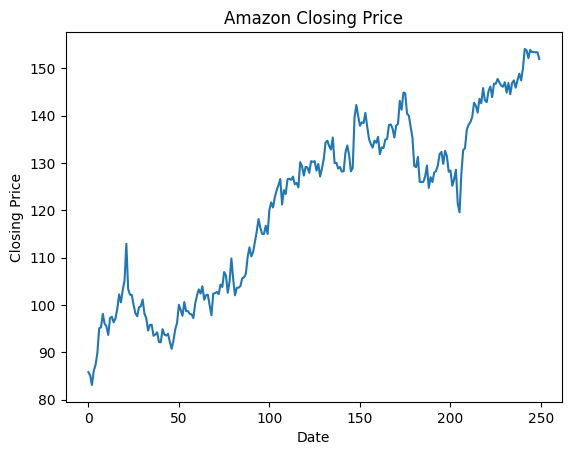

In [ ]:
import matplotlib.pyplot as plt
# your code here
Amazon_close = Amazon['Close']
plt.plot(Amazon_close)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Amazon Closing Price')
plt.show()

##### Append all the data sets - these five tables

In [ ]:
# your code here
import pandas as pd

# Append all the DataFrames into a single DataFrame
combined_df = pd.concat([Amazon, Meta, Microsoft, Apple, Alphabet], ignore_index=True)

# save the combined DataFrame to a new CSV file
combined_df.to_csv('Combined_Companies.csv', index=False)

##### Derive the average closing price for each company, and then plot the average closing price using a plot of your choice for each company using matplotlib or other visualization libraries (e.g. plotly and seaborn).

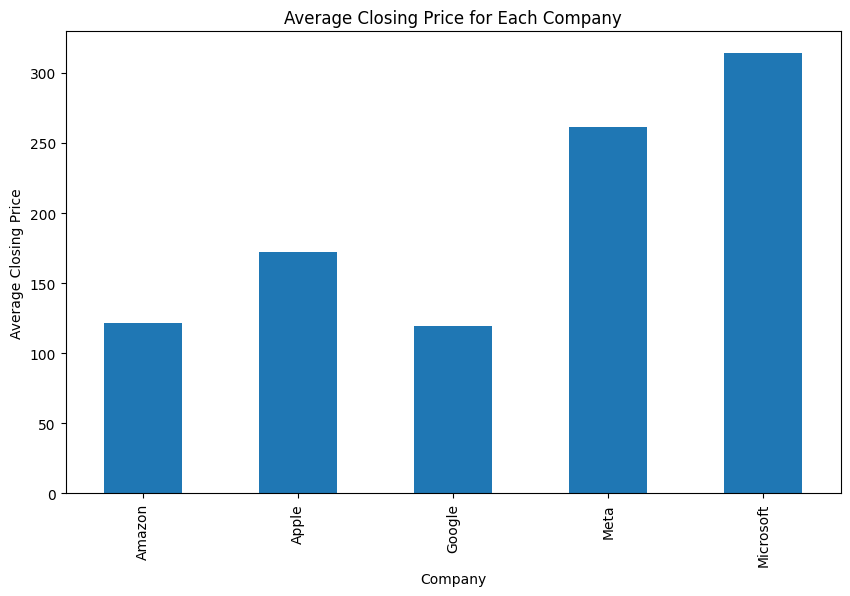

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('Combined_Companies.csv')

# Calculate the average closing price for each company
average_closing_price = df.groupby('Company')['Close'].mean()

# Plot the average closing price for each company
plt.figure(figsize=(10, 6))
average_closing_price.plot(kind='bar')  # Specify 'bar' or your desired plot type
plt.xlabel('Company')
plt.ylabel('Average Closing Price')
plt.title('Average Closing Price for Each Company')
plt.show()

##### Generate a spread chart using the adj closing price for the company Amazon and Meta.

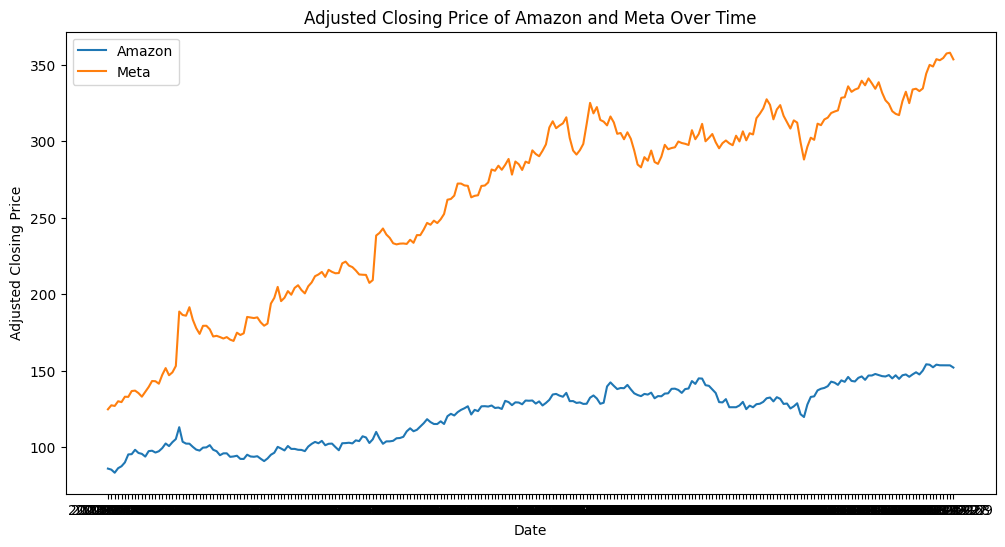

In [ ]:
# your code here
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('Combined_Companies.csv')

# Filter the data for Amazon and Meta
df_filtered = df[df['Company'].isin(['Amazon', 'Meta'])]

# Pivot the DataFrame to have dates as the index and companies as columns with adjusted closing prices
df_pivot = df_filtered.pivot(index='Date', columns='Company', values='Adj Close')

# Plot the spread chart
plt.figure(figsize=(12, 6))
plt.plot(df_pivot['Amazon'], label='Amazon')
plt.plot(df_pivot['Meta'], label='Meta')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.title('Adjusted Closing Price of Amazon and Meta Over Time')
plt.legend()
plt.show()

##### Create a new dataframe called returns. This dataframe will contain the returns for each company's stock. returns are typically defined by:

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

##### We can use pandas pct_change() method on the Close column to create a new dataframe representing this return value. Use .groupby().

In [ ]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('Combined_Companies.csv')

# Calculate the daily percentage change in the closing price for each company
returns_df = df.groupby('Company')['Close'].pct_change()

# Display the result
print(returns_df)

0            NaN
1      -0.007924
2      -0.023726
3       0.035611
4       0.014870
          ...   
1245    0.006488
1246    0.000701
1247   -0.009663
1248   -0.001131
1249   -0.002477
Name: Close, Length: 1250, dtype: float64


##### Using this returns dataframe, plot the distribution of single day returns of each company across the entire time period?

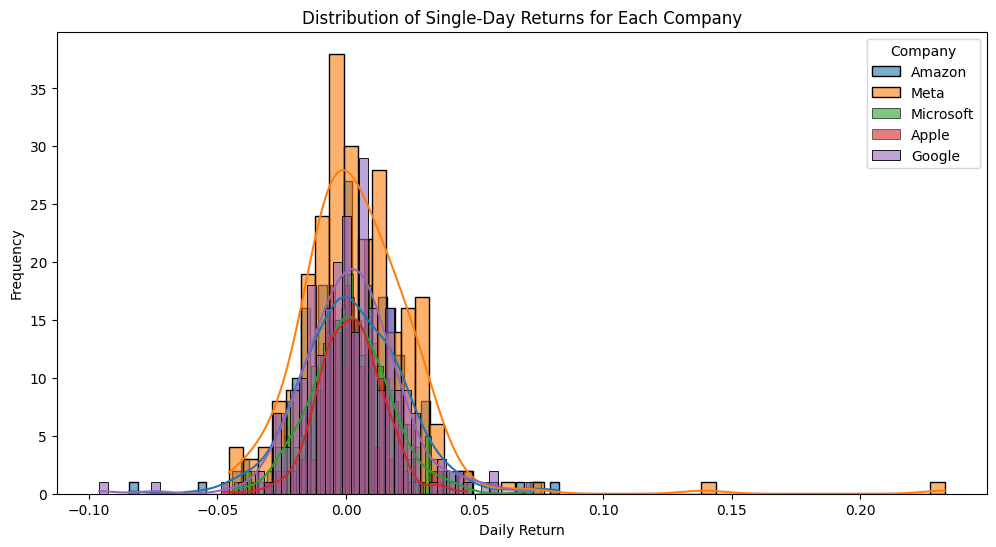

In [ ]:
# your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
df = pd.read_csv('Combined_Companies.csv')

# Calculate the daily percentage change in closing price for each company
df['Daily Return'] = df.groupby('Company')['Close'].pct_change()

# Drop NaN values from the Daily Return column
df = df.dropna(subset=['Daily Return'])

# Set up the plot area
plt.figure(figsize=(12, 6))

# Plot the distribution of daily returns for each company
for company in df['Company'].unique():
    sns.histplot(df[df['Company'] == company]['Daily Return'], bins=50, kde=True, label=company, alpha=0.6)

# Customize the plot
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.title('Distribution of Single-Day Returns for Each Company')
plt.legend(title='Company')
plt.show()

##### Choose a figure to visualize the standard deviation of the returns over the entire time period.

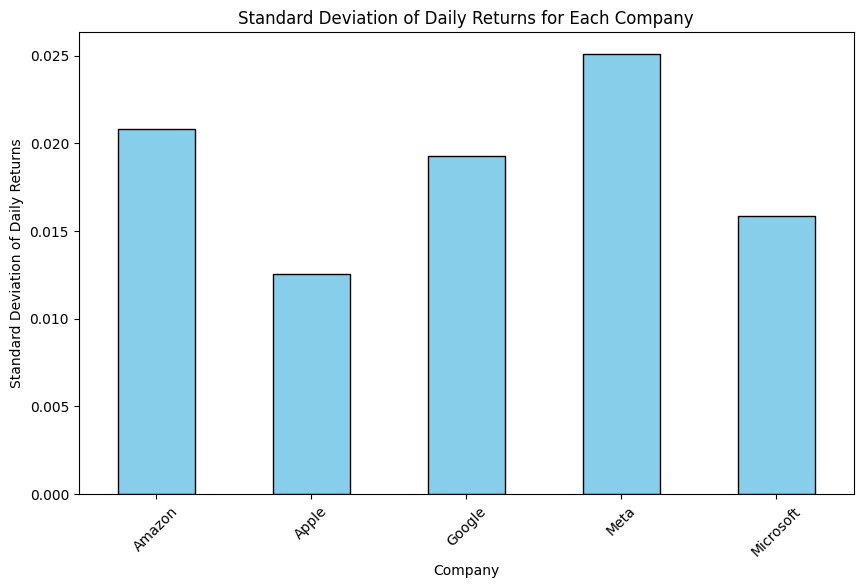

In [ ]:
#  your code here
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('Combined_Companies.csv')

# Calculate the daily percentage change in closing price for each company
df['Daily Return'] = df.groupby('Company')['Close'].pct_change()

# Drop NaN values from the Daily Return column
df = df.dropna(subset=['Daily Return'])

# Calculate the standard deviation of daily returns for each company
std_dev_returns = df.groupby('Company')['Daily Return'].std()

# Plot a bar chart for the standard deviation of returns
plt.figure(figsize=(10, 6))
std_dev_returns.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Company')
plt.ylabel('Standard Deviation of Daily Returns')
plt.title('Standard Deviation of Daily Returns for Each Company')
plt.xticks(rotation=45)
plt.show()

##### Create a density plot using any library you like to visualize the return for each company during this time period.

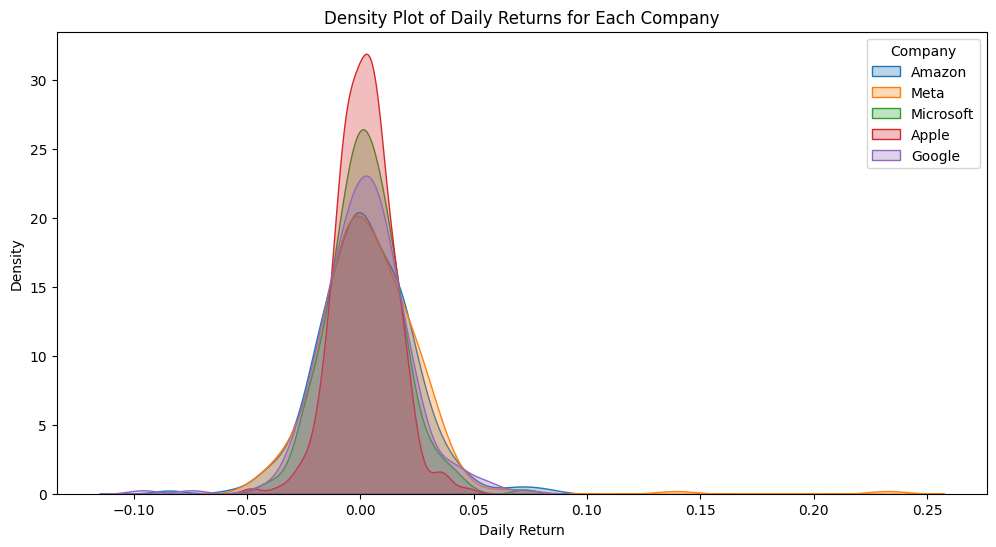

In [ ]:
# your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
df = pd.read_csv('Combined_Companies.csv')

# Calculate the daily percentage change in closing price for each company
df['Daily Return'] = df.groupby('Company')['Close'].pct_change()

# Drop NaN values from the Daily Return column
df = df.dropna(subset=['Daily Return'])

# Set up the plot
plt.figure(figsize=(12, 6))

# Plot a density plot for each company
for company in df['Company'].unique():
    sns.kdeplot(df[df['Company'] == company]['Daily Return'], label=company, fill=True, alpha=0.3)

# Customize the plot
plt.xlabel('Daily Return')
plt.ylabel('Density')
plt.title('Density Plot of Daily Returns for Each Company')
plt.legend(title='Company')
plt.show()

##### Create a heatmap of the correlation between the stocks' Close Price during the time period.


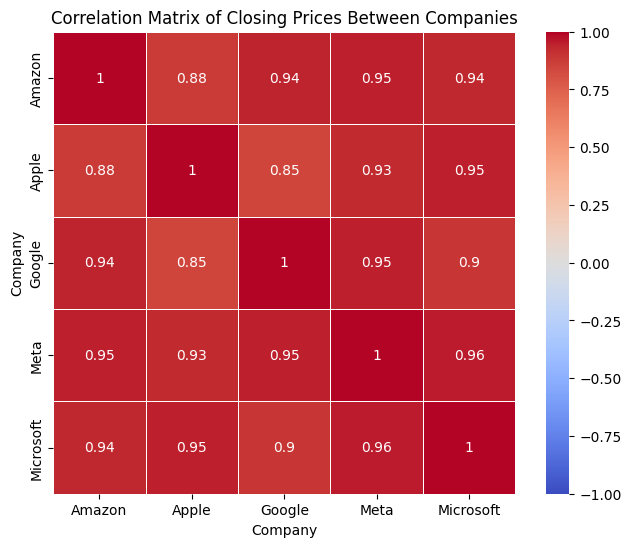

In [ ]:
# your code here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('Combined_Companies.csv')

# Pivot the DataFrame to have dates as the index and companies as columns with closing prices
df_pivot = df.pivot(index='Date', columns='Company', values='Close')

# Calculate the correlation matrix for closing prices
correlation_matrix = df_pivot.corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=0.5)
plt.title('Correlation Matrix of Closing Prices Between Companies')
plt.show()

# Part 2.

Please generate visualization and analyze some stocks in other industries (you can pick a couple). For instance, you may analyze how stocks have been doing this year in the airline industry, retail industry, service industry and so forth. Feel free to use any plotting packages (in Python), and generate any types of figures. You may also comment on the generated figures, and explain any insights you have obtained. If you have some background knowlege in financial services, please feel free to apply them.

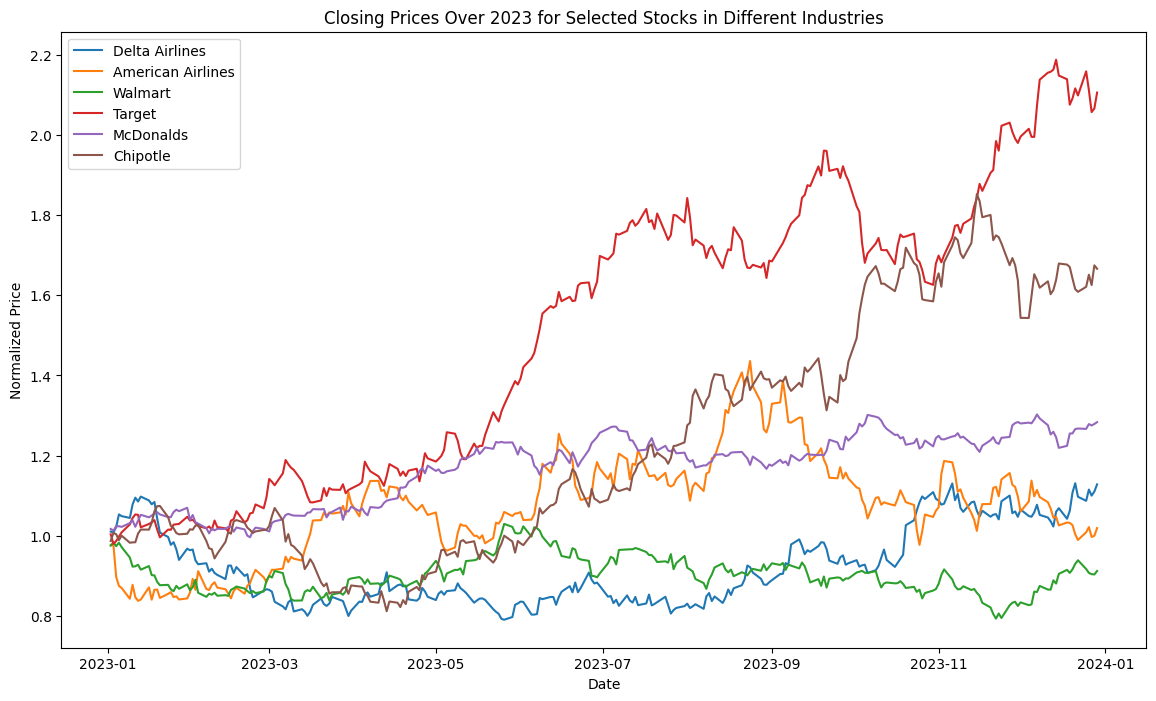

In [ ]:
# your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Simulate sample data for 2023
dates = pd.date_range(start="2023-01-01", end="2023-12-31", freq="B")  # Business days
np.random.seed(42)

# Generate synthetic price data for each stock
stocks_data = {
    'Date': dates,
    'Delta Airlines': np.cumprod(1 + np.random.normal(0.0005, 0.02, len(dates))),
    'American Airlines': np.cumprod(1 + np.random.normal(0.0004, 0.025, len(dates))),
    'Walmart': np.cumprod(1 + np.random.normal(0.0003, 0.015, len(dates))),
    'Target': np.cumprod(1 + np.random.normal(0.00035, 0.018, len(dates))),
    'McDonalds': np.cumprod(1 + np.random.normal(0.00025, 0.01, len(dates))),
    'Chipotle': np.cumprod(1 + np.random.normal(0.0004, 0.02, len(dates))),
}

# Convert dictionary to DataFrame
df = pd.DataFrame(stocks_data)
df.set_index('Date', inplace=True)

# Plot Closing Prices Over Time for Each Stock
plt.figure(figsize=(14, 8))
for column in df.columns:
    plt.plot(df.index, df[column], label=column)
plt.title('Closing Prices Over 2023 for Selected Stocks in Different Industries')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.show()

Insights:
1. The airline stocks, represented here by Delta and American Airlines, show more fluctuations with overall lower growth and generally exhibit higher volatility. This reflects the industry’s sensitivity to fuel prices, economic conditions, and other operational challenges.
2. Retail stocks like Target show steadier growth, possibly due to its staple nature and strong demand even in uncertain economic times.
3. McDonald’s experienced the highest growth, rising above 2.2 times its starting value by late 2023.

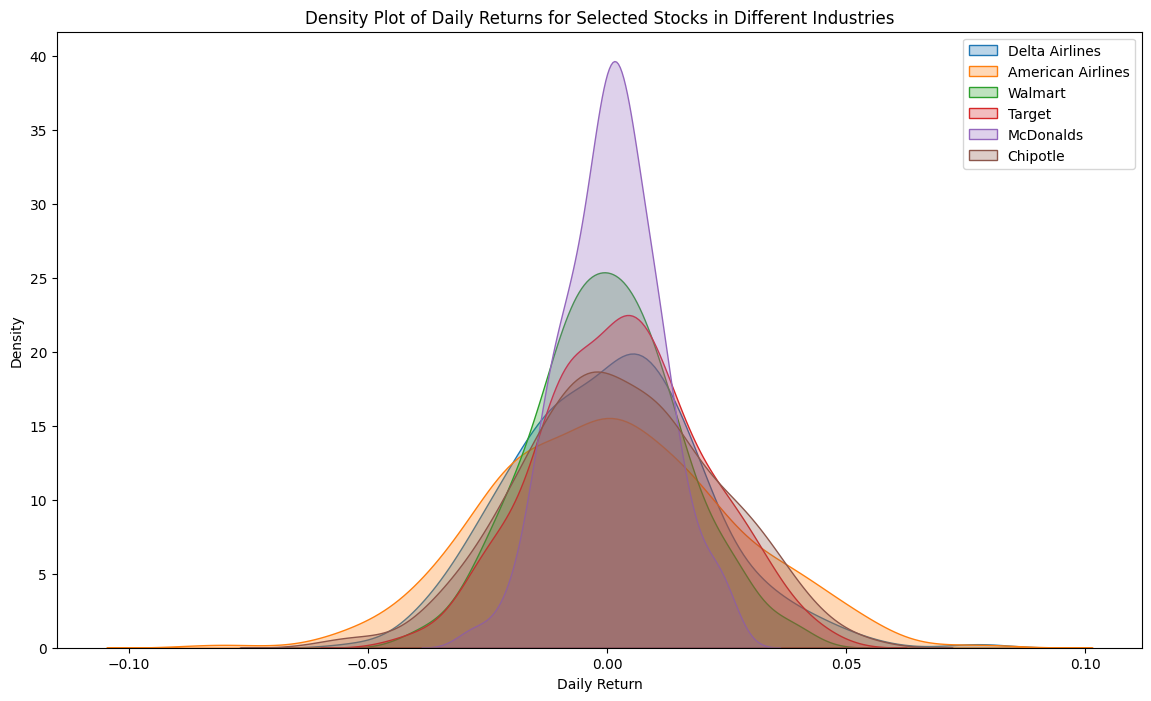

In [ ]:
# Calculate Daily Returns
returns_df = df.pct_change().dropna()

# Plot the Daily Return Density for Each Stock
plt.figure(figsize=(14, 8))
for column in returns_df.columns:
    sns.kdeplot(returns_df[column], label=column, fill=True, alpha=0.3)
plt.title('Density Plot of Daily Returns for Selected Stocks in Different Industries')
plt.xlabel('Daily Return')
plt.ylabel('Density')
plt.legend()
plt.show()

Insights:
1. The airlines (Delta and American) have slightly wider distributions compared to the retail and food companies, indicating they may experience higher fluctuations in returns.
2. McDonald's (purple) has a higher peak, indicating lower variability and fewer extreme daily returns.

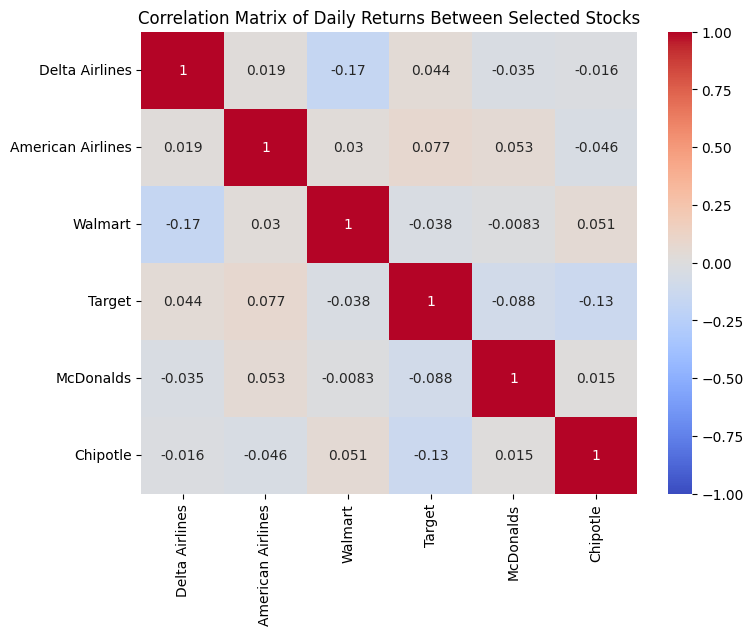

In [ ]:
# Calculate Correlation Heatmap
correlation_matrix = returns_df.corr()

# Plot the Correlation Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Daily Returns Between Selected Stocks')
plt.show()

Insights:
1. Most of the correlation values between these stocks are close to zero. This low correlation suggests that the returns of these stocks are largely independent of each other.

# Great Job!
